In [ ]:
import networkx as nx
import warnings
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
warnings.filterwarnings('ignore')

In [ ]:
%matplotlib inline

In [ ]:
import networkx as nx

# Файлаас сүлжээг унших функц
def read_net(filename):
    # Хоосон график үүсгэх
    g = nx.Graph()

    # Тодорхой файлыг уншихад нээнэ
    with open(filename) as f:
        # Эхний мөрийг (глобал мэдээлэл) уншиж, тооцоолохгүй
        f.readline()

        # Файлын бүх мөрийг дамжуулан уншина
        for l in f:
            # Мөрийг хэсэгт хуваана
            l = l.split(",")
            # Хоёр зангилааны хооронд ирмэг нэмнэ
            g.add_edge(l[0], l[1])

    # Уншсан графикийг буцаана
    return g

# Game of Thrones-ийн 6-р улирлын өгөгдөл
season = 6
# Тухайн CSV файлаас ирмэгийг уншина
g = read_net(f'/content/got-s{season}-edges.csv')

# Гэрийн мэдээллийг хадгалах үүргүүдийг үүсгэнэ
houses = {}

# Узагч файлыг уншихад нээнэ
with open(f'/content/got-s{season}-nodes.csv') as f:
    # Узагч файлын бүх мөрийг дамжуулан уншина
    for l in f:
        # Мөрийг зангилааны нэр болон гэрийн мэдээлэлд хуваана
        node, _, house = l.rstrip().split(",")
        # Зангилааг графикт нэмнэ, гэрийн мэдээллийг атрибут болгон хадгална
        g.add_node(node, house=house)

# Узагчийн байрлал тооцоолох
pos = nx.spring_layout(g)

In [ ]:
# Google Colab-д Google Drive-ийг холбох
from google.colab import drive

# Google Drive-ийг /content/drive замд холбох
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import networkx as nx

# Жижиг хэмжээний графыг дүрслэж харуулах зорилготойгоор бичсэн нэмэлт функц
def draw_net(G, pos, measures, measure_name):
    # Дүрслэлийн хэмжээ
    plt.figure(figsize=(20, 20))

    # Зангилаануудыг дүрслэх
    nodes = nx.draw_networkx_nodes(G, pos,
                                     node_size=250,  # Зангилааны хэмжээ
                                     cmap=plt.cm.plasma,  # Өнгийн схем
                                     node_color=list(measures.values()),  # Зангилааны өнгө
                                     nodelist=measures.keys())  # Зангилааны жагсаалт

    # Өнгийн нормализаци
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))

    # Зангилааны нэрсийг дүрслэх
    labels = nx.draw_networkx_labels(G, pos)

    # Ирмэгүүдийг дүрслэх
    edges = nx.draw_networkx_edges(G, pos, alpha=0.2)

    # Дүрслэлийн гарчиг
    plt.title(measure_name)

    # Өнгийн барийг нэмэх
    plt.colorbar(nodes)

    # Дүрслэлийг харагдах байдалгүй болгох
    plt.axis('off')

    # Дүрслэлийг харуулах
    plt.show()

In [ ]:
# Зангилааны зэргийн тоог тооцоолох
degrees = dict(g.degree())  # Зангилаануудын зэргийн тоог тооцоолно (хэрвээ зааварласан бол).

# Зэрэглэлийг бууруулах дарааллаар ангилах
ranks = [(k, v) for k, v in sorted(degrees.items(), key=lambda item: -item[1])]
# Дээд 5 зэргийг харуулах
ranks[0:5]

# Жишээ гаралт:
# [('SANSA', 40), ('JON', 31), ('CERSEI', 27), ('TYRION', 26), ('JAIME', 24)]

# Графикийг дүрслэх
draw_net(g, pos, degrees, 'Degree Centrality')

In [ ]:
closeness = nx.closeness_centrality(g) # compute the closeness centraliry of all nodes

In [ ]:
# Зөвлөгөөний зэргийг бууруулах дарааллаар ангилах
ranks = [(k, v) for k, v in sorted(closeness.items(), key=lambda item: -item[1])]
# Дээд 5 зэргийг харуулах
ranks[0:5]

[('SANSA', 0.480966882375333),
 ('TYRION', 0.42661103607949064),
 ('JON', 0.4208460220784164),
 ('CERSEI', 0.4152347417840376),
 ('JAIME', 0.41112350671686887)]

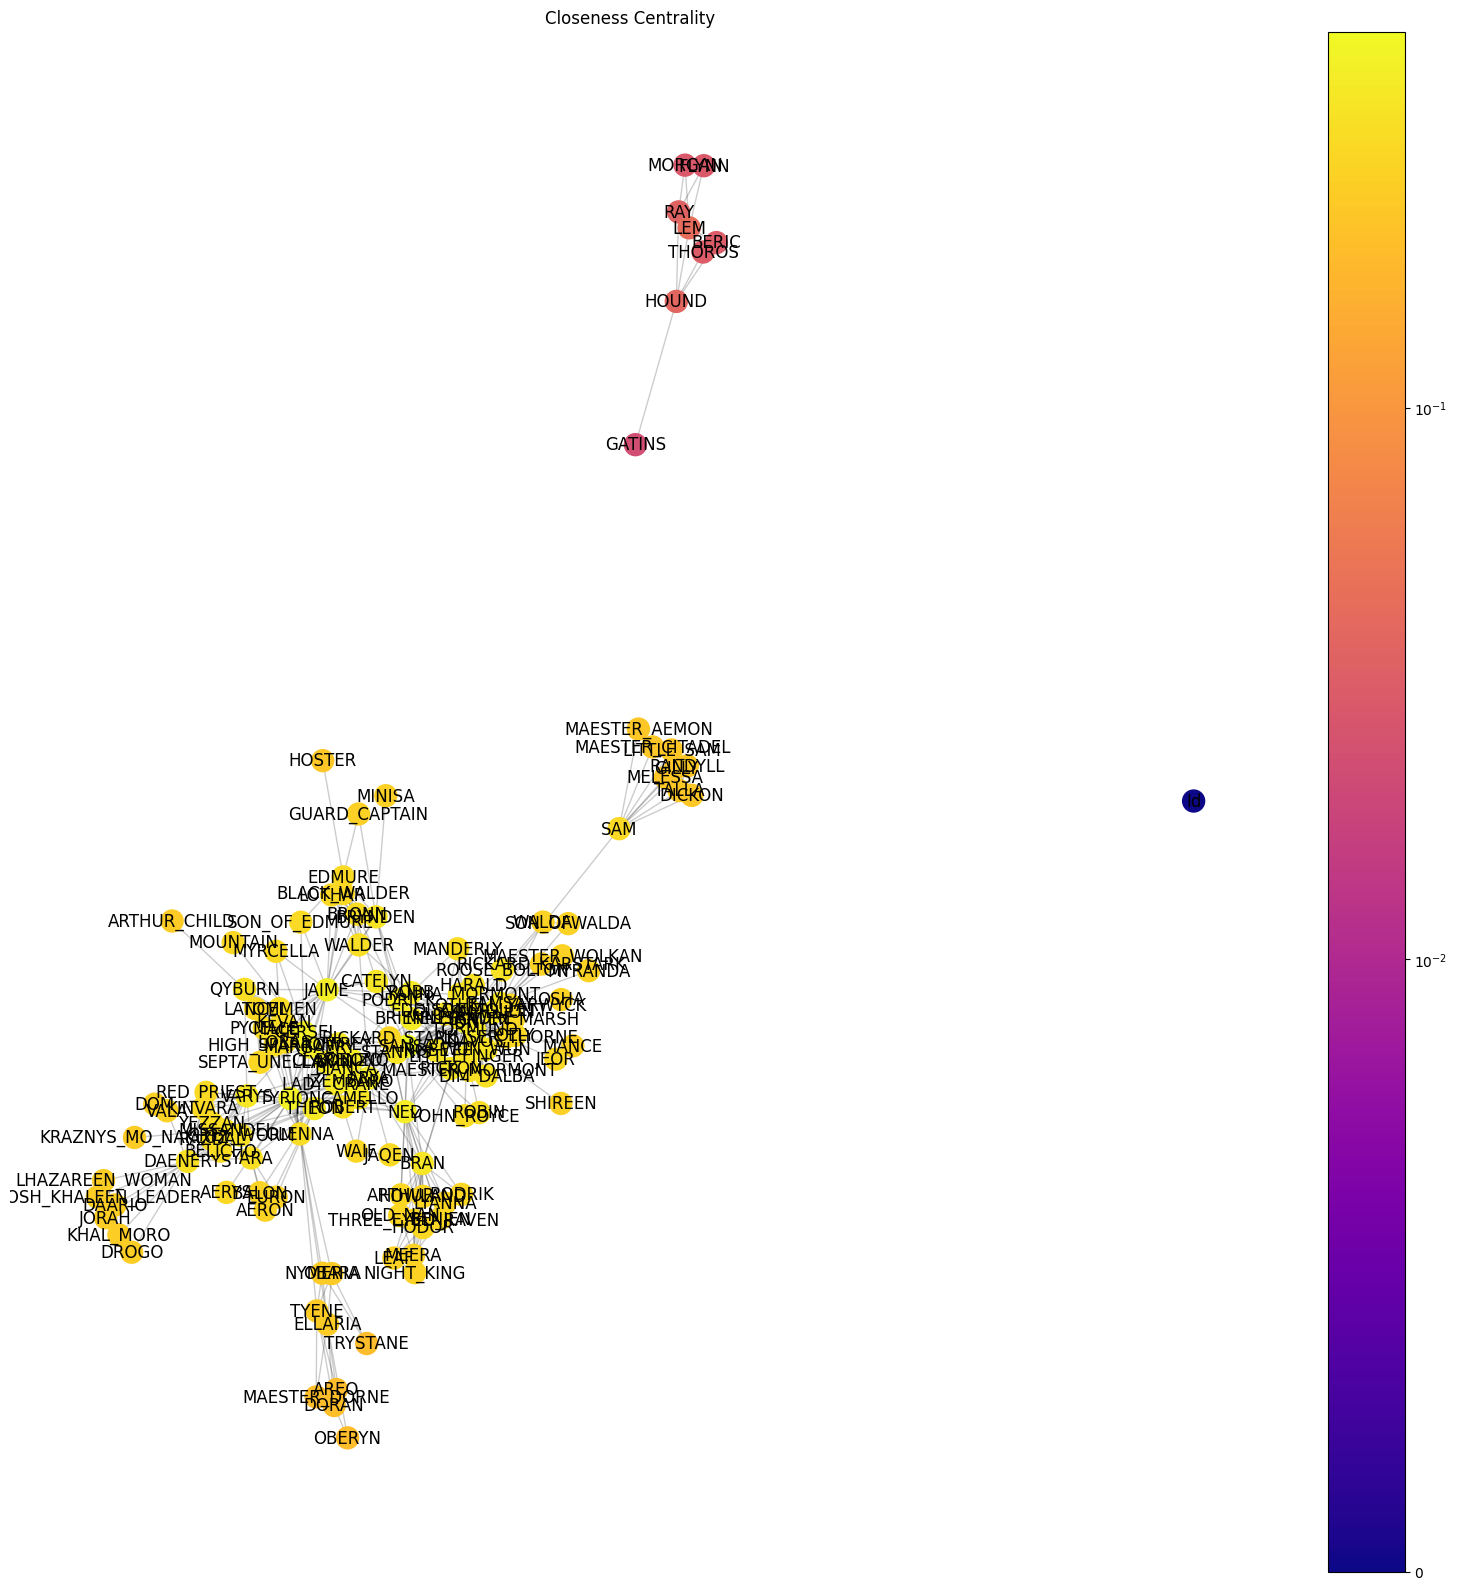

In [ ]:
# Графикийг дүрслэх
draw_net(g, pos, closeness, 'Closeness Centrality')

In [ ]:
betweenness = nx.betweenness_centrality(g) # compute the betweenness centraliry of all nodes

In [ ]:
# Betweenness centrality-ийг агуулсан dictionary (нодууд болон тэдгээрийн утгууд)
# Бетвийнесийн төвшингийн утгуудыг буцааж авна
ranks = [(k, v) for k, v in sorted(betweenness.items(), key=lambda item: -item[1])]
# Бетвийнесийн төвшингийн утгаас дээдээс доош нь эрэмбэлж, нодуудын жагсаалтыг үүсгэнэ
# Дээд 5-н нодуудыг авна
ranks[0:5]

[('SANSA', 0.2589247706776543),
 ('JON', 0.18865041688178846),
 ('TYRION', 0.14643956731944027),
 ('JAIME', 0.12861223368885352),
 ('CERSEI', 0.1155676152654065)]

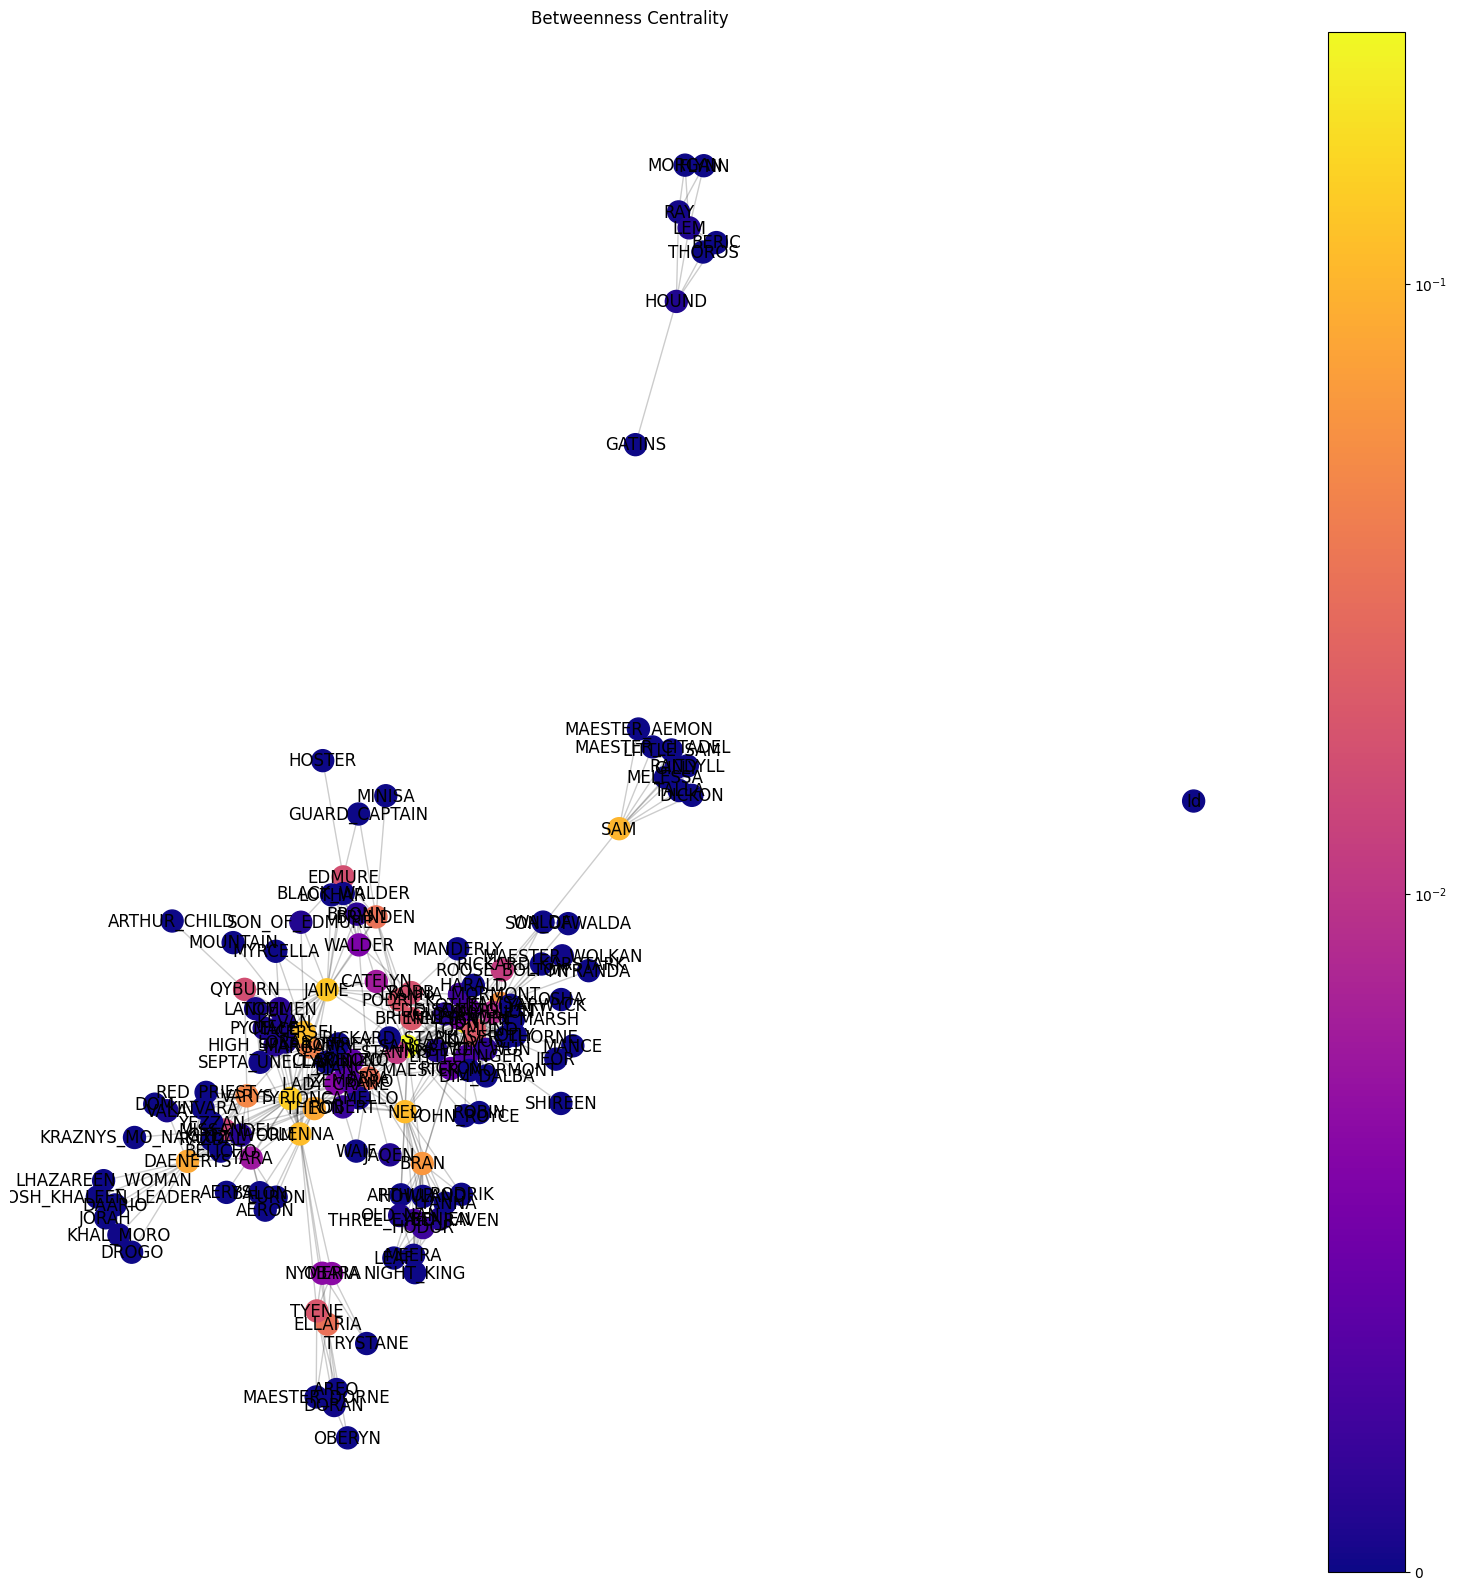

In [ ]:
# Графикийг дүрслэх
draw_net(g, pos, betweenness, 'Betweenness Centrality')

In [ ]:
harmonic = nx.harmonic_centrality(g)

In [ ]:
# Harmonic centrality-ийг агуулсан dictionary (нодууд болон тэдгээрийн утгууд)
# Хармоник төвшингийн утгуудыг буцааж авна
ranks = [(k, v) for k, v in sorted(harmonic.items(), key=lambda item: -item[1])]
# Хармоник төвшингийн утгаас дээдээс доош нь эрэмбэлж, нодуудын жагсаалтыг үүсгэнэ
# Дээд 5-н нодуудыг авна
ranks[0:5]

[('SANSA', 81.41666666666664),
 ('JON', 73.33333333333337),
 ('TYRION', 71.91666666666667),
 ('CERSEI', 70.50000000000003),
 ('JAIME', 69.00000000000003)]

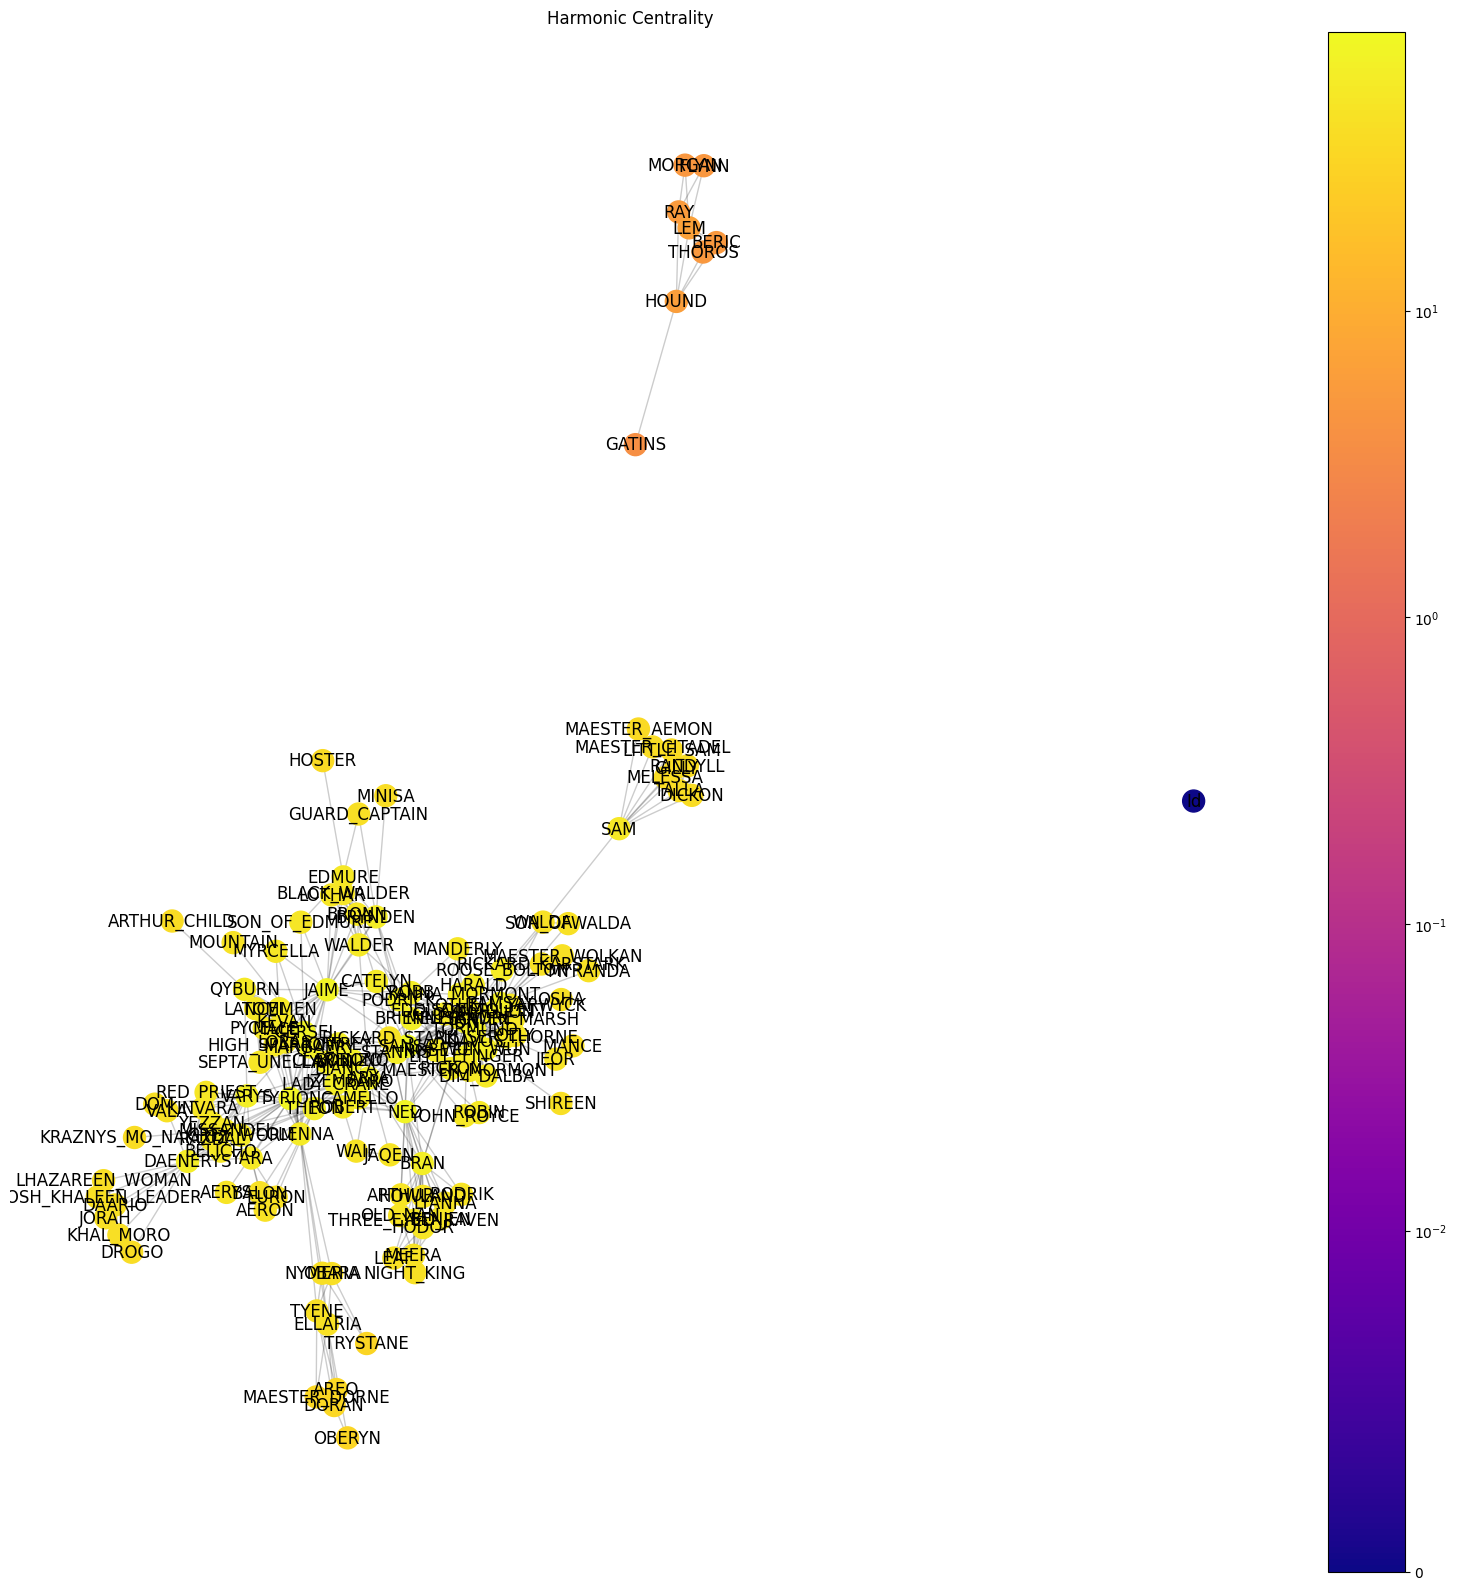

In [ ]:
# Графикийг дүрслэх
draw_net(g, pos, harmonic, 'Harmonic Centrality')

In [ ]:
pagerank = nx.pagerank(g)

In [ ]:
# PageRank-ийг агуулсан dictionary (нодууд болон тэдгээрийн утгууд)
# PageRank-ийн утгуудыг буцааж авна
ranks = [(k, v) for k, v in sorted(pagerank.items(), key=lambda item: -item[1])]
# PageRank-ийн утгаас дээдээс доош нь эрэмбэлж, нодуудын жагсаалтыг үүсгэнэ
# Дээд 5-н нодуудыг авна
ranks[0:5]

[('SANSA', 0.0283610781602461),
 ('JON', 0.02336620768889073),
 ('CERSEI', 0.020257175030860622),
 ('TYRION', 0.0201675946416887),
 ('JAIME', 0.01853234006464307)]

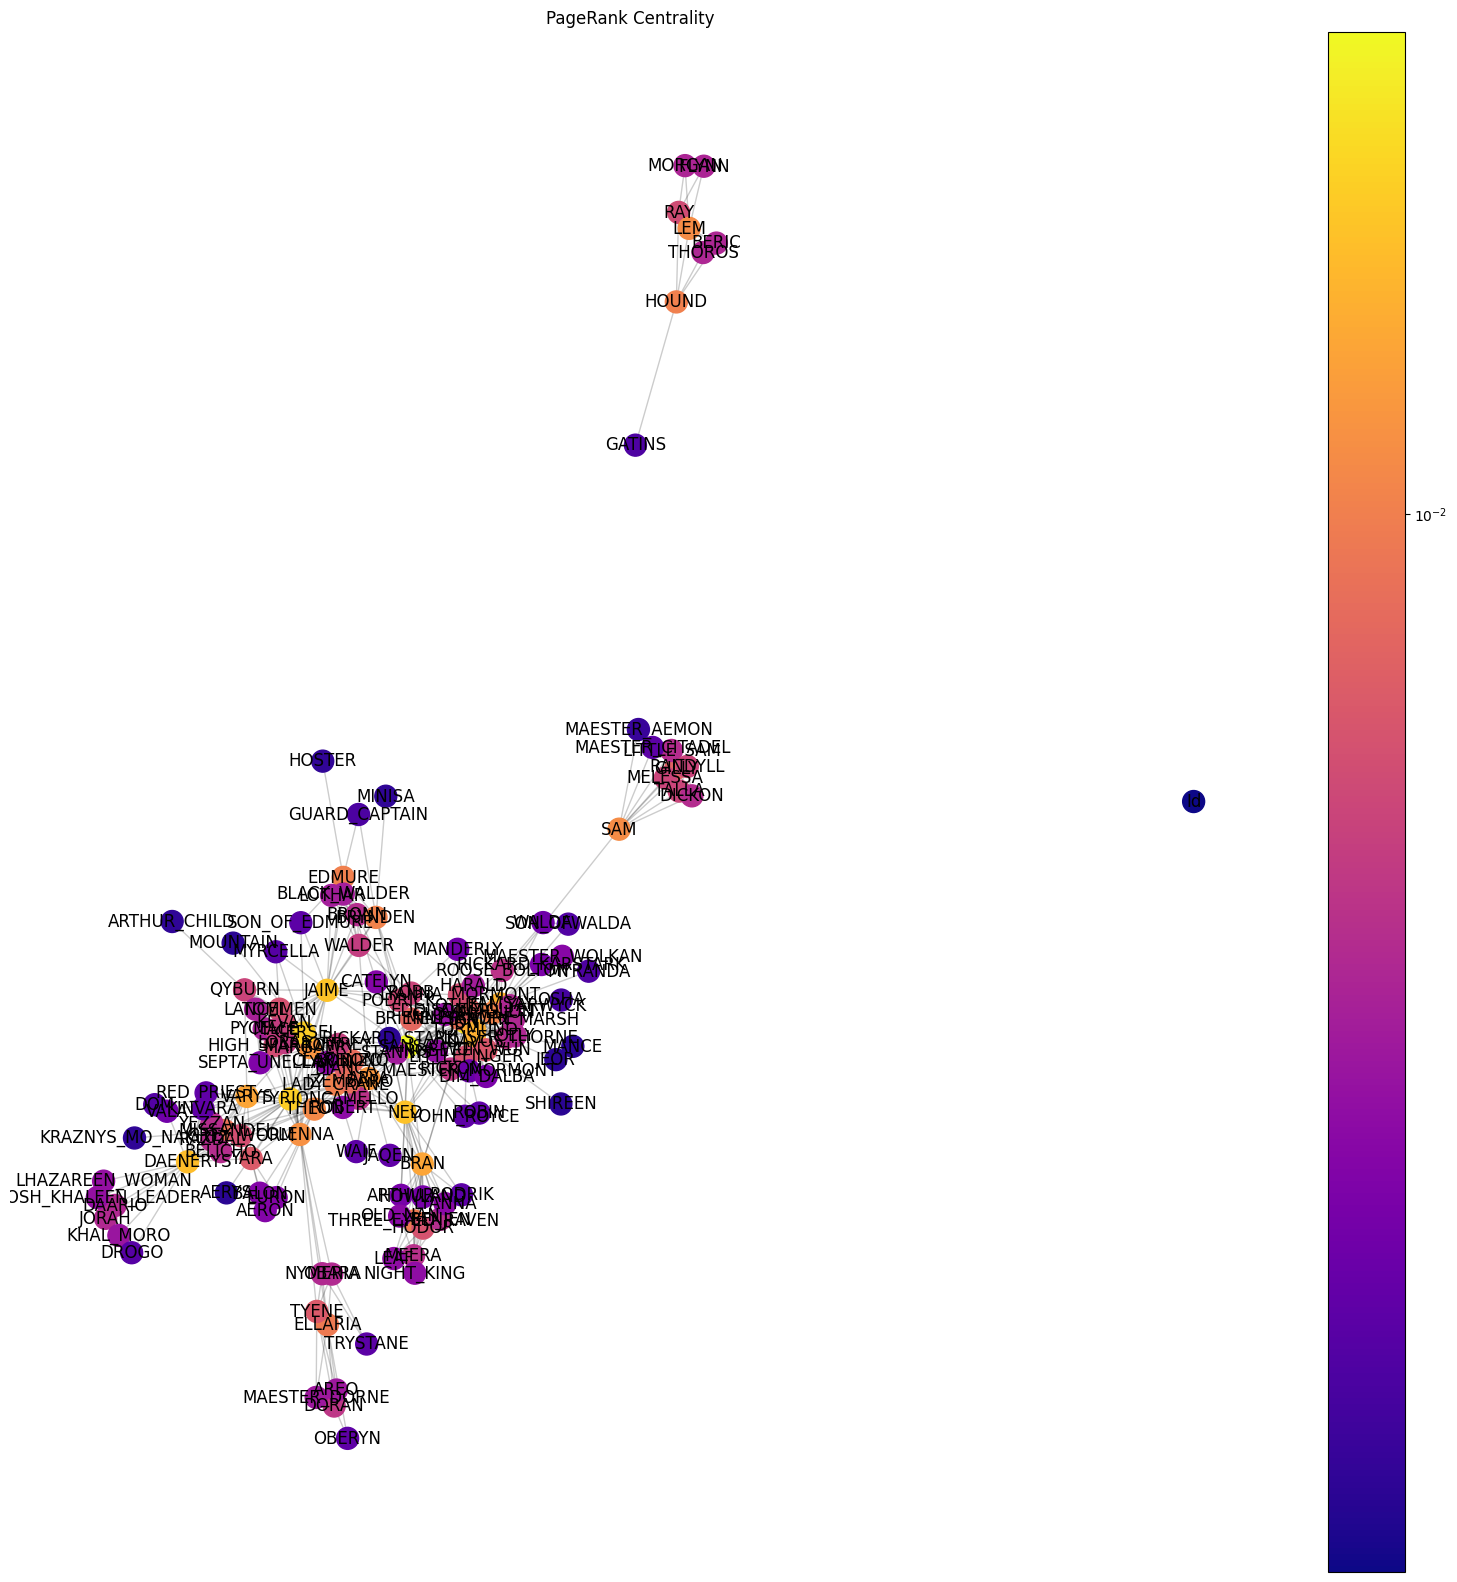

In [ ]:
# Графикийг дүрслэх
draw_net(g, pos, pagerank, 'PageRank Centrality')

In [ ]:
eigen = nx.eigenvector_centrality(g)

In [ ]:
# Eigenvector centrality-ийг агуулсан dictionary (нодууд болон тэдгээрийн утгууд)
# Eigenvector төвшингийн утгуудыг буцааж авна
ranks = [(k, v) for k, v in sorted(eigen.items(), key=lambda item: -item[1])]
# Eigenvector төвшингийн утгаас дээдээс доош нь эрэмбэлж, нодуудын жагсаалтыг үүсгэнэ
# Дээд 5-н нодуудыг авна
ranks[0:5]

[('SANSA', 0.3681703250620049),
 ('JON', 0.25752583885620856),
 ('DAVOS', 0.2120919196122236),
 ('TORMUND', 0.20473555675107596),
 ('TYRION', 0.200968439452155)]

In [ ]:
# Графикийг дүрслэх
draw_net(g, pos, eigen, 'Eigenvector Centrality')

In [ ]:
nx.degree_assortativity_coefficient(g)

-0.006283179316286593

In [ ]:
import networkx as nx
print(nx.__version__)


3.4.2


In [ ]:
# Хэрэглэгчийн графын узелүүдийн дундаж хөршийн зэрэг (degree)-ийг тооцоолно
knn = nx.average_degree_connectivity(g)  # Узелүүдийн k зэрэгтэй узелүүдийн дундаж хөршийн зэрэг
# Дундаж хөршийн зэргийг эрэмбэлж, dictionary-ийг үүсгэнэ
knn = dict(sorted(knn.items()))

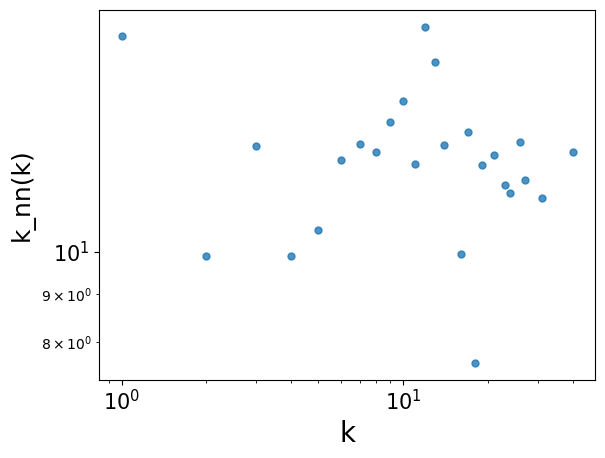

In [ ]:
# k болон k_nn(k) утгуудыг график дээр зурна
plt.plot(list(knn.keys()), list(knn.values()), '.', ms=10, alpha=0.8)
# Логарифм график (log-log) дээр зурна
plt.loglog()
# X тагийн нэрийг тодорхойлно
plt.xlabel("k", fontsize=20)
# Y тагийн нэрийг тодорхойлно
plt.ylabel("k_nn(k)", fontsize=18)
# X тагийн хэмжээ
plt.xticks(fontsize=15)
# Y тагийн хэмжээ
plt.yticks(fontsize=15)
# Графикийг харуулах
plt.show()

In [ ]:
nx.attribute_assortativity_coefficient(g, 'house')

0.20747480547396627

In [ ]:
h = g.copy()

In [ ]:
!pip install --upgrade "pip<24.1"
!pip install node_conformity

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
DEPRECATION: node-conformity 0.0.2 has a non-standard dependency specifier numpy>=1.15.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of node-conformity or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: node-conformity 0.0.2 has a non-standard dependency specifier tqdm>=4.20.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of node-conformity or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [ ]:
# Attribute conformity-ийг импортлох
from conformity import attribute_conformity
import pandas as pd

# Холбогдсон компонентуудыг авах бөгөөд томоохон компонентуудыг эрэмбэлнэ
gcc = sorted(nx.connected_components(h), key=len, reverse=True)
# Хамгийн том компонентын дэд графыг үүсгэнэ
h0 = h.subgraph(gcc[0])
# Conformity-ийн тооцооллыг гүйцэтгэнэ
alphas = [1.0, 2.0, 3.0, 4.0, 5.0]  # Унтуулагч хүчин зүйлс
res = attribute_conformity(h0, alphas, ['house'], profile_size=1)

100%|██████████| 134/134 [00:00<00:00, 314.33it/s]


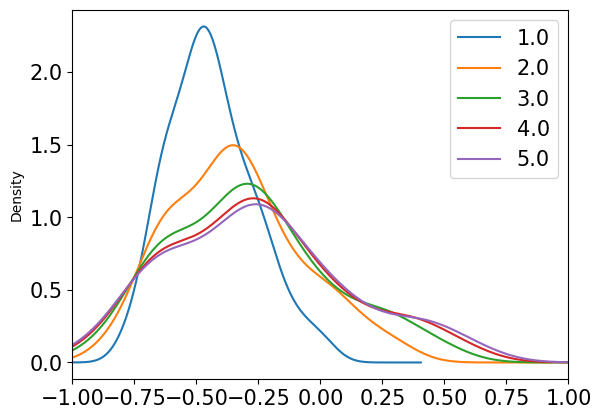

In [ ]:
# Графикыг дүрсэлхийн тулд subplots-ыг үүсгэнэ
_, ax = plt.subplots()

# Конформити-гийн үр дүнг явуулна
for alpha, profiles in res.items():
    for profile, data in profiles.items():
        # Дата-г DataFrame болгон хөрвүүлнэ
        df = pd.DataFrame(list(data.values()), columns=[alpha])
        # Kernel Density Estimation (KDE) график зурах
        df.plot.kde(ax=ax)

# X болон Y тагийн хэмжээ
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# X тагийн хязгаар
plt.xlim((-1, 1))
# Legend-ийн хэмжээ
plt.legend(fontsize=15)
# Графикийг харуулах
plt.show()

In [ ]:
conf_a3 = res['3.0']['house']

In [ ]:
node_assortativity = [(k, v) for k, v in sorted(conf_a3.items(), key=lambda item: item[1])]

In [ ]:
for nd in node_assortativity[0:5]:
    print(f"{nd[0]: >20}\t{nd[1]: >10}\t{h.nodes[nd[0]]['house']: >20}")

                JEOR	-0.931038573874242	       Night's Watch
             SHIREEN	-0.9287300518300002	           Baratheon
               GILLY	-0.816164752888596	           Wildlings
        ARTHUR_CHILD	-0.8074085546571529	            Commoner
     MAESTER_CITADEL	-0.778874474317457	             Citadel


In [ ]:
for nd in list(reversed(node_assortativity[-6:-1])):
    print(f"{nd[0]: >20}\t{nd[1]: >10}\t{h.nodes[nd[0]]['house']: >20}")

              LYANNA	0.48983121524161594	               Stark
       RICKARD_STARK	0.44896734570683966	               Stark
         SON_OFWALDA	0.4376999846379132	              Bolton
              BENJEN	0.3502922883738541	               Stark
               WALDA	0.33535527594258246	              Bolton


In [ ]:
na = {c[0]: c[1] for c in node_assortativity}

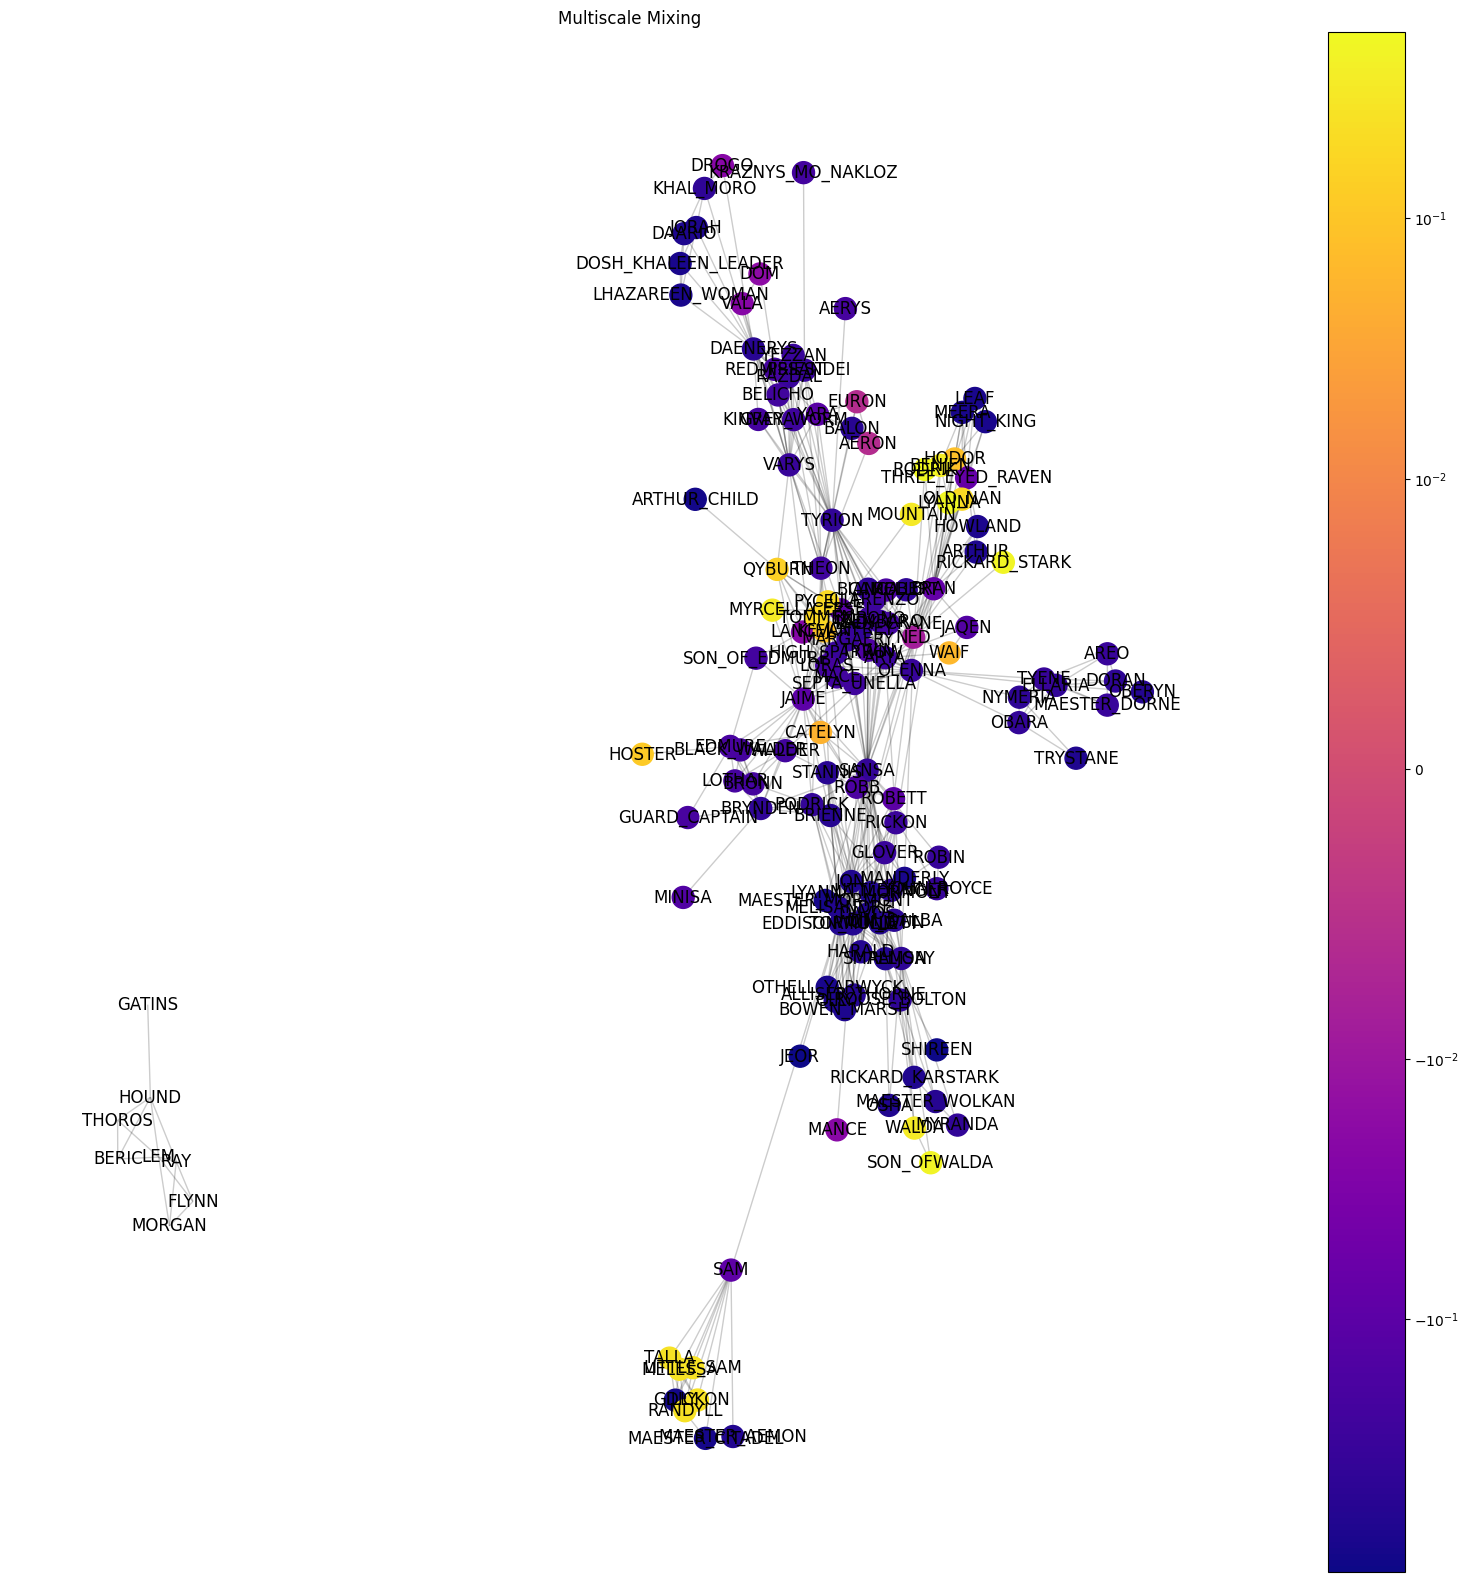

In [ ]:
# Графикийг дүрслэх
draw_net(h, pos, na, "Multiscale Mixing")

In [ ]:
# Undirected графыг үүсгэнэ
G = nx.Graph()
edges = [(1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (4, 5)]
G.add_edges_from(edges)

# Degree centrality тооцоолно
degree_centrality = nx.degree_centrality(G)

# Undirected графын degree centrality-г хэвлэнэ
print("Degree Centrality for Undirected Graph:")
for node, centrality in degree_centrality.items():
    print(f"Node {node}: {centrality}")

# Directed графыг үүсгэнэ
DG = nx.DiGraph()
edges = [(1, 2), (2, 3), (3, 1), (3, 4), (4, 5)]
DG.add_edges_from(edges)

# In-degree ба out-degree centrality тооцоолно
in_degree_centrality = nx.in_degree_centrality(DG)
out_degree_centrality = nx.out_degree_centrality(DG)

# Үр дүнг хэвлэнэ
print("\nIn-Degree Centrality for Directed Graph:")
for node, centrality in in_degree_centrality.items():
    print(f"Node {node}: {centrality}")

print("\nOut-Degree Centrality for Directed Graph:")
for node, centrality in out_degree_centrality.items():
    print(f"Node {node}: {centrality}")

# Сургалтын дата (edge list CSV файл: "source,target")-ийг ачаална
import networkx as nx
import pandas as pd

df = pd.read_csv("/content/source_target_dataset.csv")  # Жишээ файл

# Directed графыг үүсгэнэ
G = nx.from_pandas_edgelist(df, source="source", target="target", create_using=nx.DiGraph())

# Degree centrality тооцоолно
degree_centrality = nx.degree_centrality(G)

# Дээд нөлөөтэй хүмүүсийг хайна
top_influencers = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Degree centrality-д үндэслэн дээд 10-н нөлөөтэй хүний мэдээллийг хэвлэнэ
print("\nTop 10 Influencers based on Degree Centrality:")
for node, centrality in top_influencers:
    print(f"User {node}: {centrality}")

Degree Centrality for Undirected Graph:
Node 1: 0.5
Node 2: 0.75
Node 3: 0.75
Node 4: 0.75
Node 5: 0.25

In-Degree Centrality for Directed Graph:
Node 1: 0.25
Node 2: 0.25
Node 3: 0.25
Node 4: 0.25
Node 5: 0.25

Out-Degree Centrality for Directed Graph:
Node 1: 0.25
Node 2: 0.25
Node 3: 0.5
Node 4: 0.25
Node 5: 0.0

Top 10 Influencers based on Degree Centrality:
User Good morning: 0.25
User Hello: 0.125
User Hi: 0.125
User How are you?: 0.125
User I'm good, thanks!: 0.125
User What's your name?: 0.125
User My name is John.: 0.125
User Goodbye: 0.125
User See you later: 0.125
